# Preprocessing

## 1. Imports

### 1.1 Libraries

In [63]:
# builtin
import os, time, sys, random

# data
import pandas as pd
import numpy as np
import requests
import math

# viz
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLP
import string
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.corpus import RegexpTokenizer
from nltk.stem.snowball import FrenchStemmer
from collections import Counter
import spacy

# ML
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import scipy.sparse as sp

# other
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### 1.2 Download and options

In [64]:
nltk.download('stopwords')
nltk.download('wordpunct')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Melvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading wordpunct: Package 'wordpunct' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Melvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Melvin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Melvin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
sns.set()

### 1.3 Loading data

In [66]:
df = pd.read_csv(r"..\CSV\df_movies_cleaned.csv")

## Variable "Synopsis"

### 2. Work on a specific document

In [67]:
# Fonction de saut de ligne pour output
def insert_newlines(string, every=80):
    lines = []
    for i in range(0, len(string), every):
        lines.append(string[i:i+every])
    return '\n'.join(lines)

In [68]:
doc = df.Synopsis.sample(1)
doc = doc.values[0]
print(insert_newlines(doc, every=200))

Tom Brand est un milliardaire qui a consacré sa vie à son travail et à sa réussite. Sa carrière trépidante l’a éloigné de sa femme Lara et de son adorable fille Rebecca. Pour l’anniversaire de cette d
ernière, Tom n’a d’autre choix que de lui offrir ce qu’il déteste par-dessus tout : un chat. En route pour la fête de Rebecca, Tom est victime d’un terrible accident et se retrouve mystérieusement coi
ncé dans le corps du chat.  Répondant désormais au doux nom de Monsieur Fuzzypants, il est adopté par sa propre famille qui peine à maîtriser ce chat maladroit et peu obéissant… Tom va devoir tant bie
n que mal se faire à sa nouvelle condition tout en portant un nouveau regard sur son entourage. Il devra comprendre pourquoi il s’est retrouvé dans cette situation et tout mettre en œuvre pour reconqu
érir son apparence humaine.


### 2.1 Lower

In [69]:
doc = doc.lower()

In [70]:
print(insert_newlines(doc, every=200))

tom brand est un milliardaire qui a consacré sa vie à son travail et à sa réussite. sa carrière trépidante l’a éloigné de sa femme lara et de son adorable fille rebecca. pour l’anniversaire de cette d
ernière, tom n’a d’autre choix que de lui offrir ce qu’il déteste par-dessus tout : un chat. en route pour la fête de rebecca, tom est victime d’un terrible accident et se retrouve mystérieusement coi
ncé dans le corps du chat.  répondant désormais au doux nom de monsieur fuzzypants, il est adopté par sa propre famille qui peine à maîtriser ce chat maladroit et peu obéissant… tom va devoir tant bie
n que mal se faire à sa nouvelle condition tout en portant un nouveau regard sur son entourage. il devra comprendre pourquoi il s’est retrouvé dans cette situation et tout mettre en œuvre pour reconqu
érir son apparence humaine.


### 2.2 Tokenization

In [71]:
tokens = word_tokenize(doc)
tokens

['tom',
 'brand',
 'est',
 'un',
 'milliardaire',
 'qui',
 'a',
 'consacré',
 'sa',
 'vie',
 'à',
 'son',
 'travail',
 'et',
 'à',
 'sa',
 'réussite',
 '.',
 'sa',
 'carrière',
 'trépidante',
 'l',
 '’',
 'a',
 'éloigné',
 'de',
 'sa',
 'femme',
 'lara',
 'et',
 'de',
 'son',
 'adorable',
 'fille',
 'rebecca',
 '.',
 'pour',
 'l',
 '’',
 'anniversaire',
 'de',
 'cette',
 'dernière',
 ',',
 'tom',
 'n',
 '’',
 'a',
 'd',
 '’',
 'autre',
 'choix',
 'que',
 'de',
 'lui',
 'offrir',
 'ce',
 'qu',
 '’',
 'il',
 'déteste',
 'par-dessus',
 'tout',
 ':',
 'un',
 'chat',
 '.',
 'en',
 'route',
 'pour',
 'la',
 'fête',
 'de',
 'rebecca',
 ',',
 'tom',
 'est',
 'victime',
 'd',
 '’',
 'un',
 'terrible',
 'accident',
 'et',
 'se',
 'retrouve',
 'mystérieusement',
 'coincé',
 'dans',
 'le',
 'corps',
 'du',
 'chat',
 '.',
 'répondant',
 'désormais',
 'au',
 'doux',
 'nom',
 'de',
 'monsieur',
 'fuzzypants',
 ',',
 'il',
 'est',
 'adopté',
 'par',
 'sa',
 'propre',
 'famille',
 'qui',
 'peine',
 'à'

In [72]:
# longueur de la liste
len(tokens)

166

In [73]:
# longueur de la liste (sans les doublons)
len(set(tokens))

102

In [74]:
def display_tokens_infos(tokens):
    """display info about corpus"""

    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

In [75]:
tokens = wordpunct_tokenize(doc)
display_tokens_infos(tokens)

nb tokens 169, nb tokens uniques 104
['tom', 'brand', 'est', 'un', 'milliardaire', 'qui', 'a', 'consacré', 'sa', 'vie', 'à', 'son', 'travail', 'et', 'à', 'sa', 'réussite', '.', 'sa', 'carrière', 'trépidante', 'l', '’', 'a', 'éloigné', 'de', 'sa', 'femme', 'lara', 'et']


### 2.3 Stopwords

In [76]:
stop_words = set(stopwords.words('french'))

In [77]:
tokens = [w for w in tokens if w not in stop_words]
display_tokens_infos(tokens)

nb tokens 101, nb tokens uniques 77
['tom', 'brand', 'milliardaire', 'a', 'consacré', 'vie', 'travail', 'réussite', '.', 'carrière', 'trépidante', '’', 'a', 'éloigné', 'femme', 'lara', 'adorable', 'fille', 'rebecca', '.', '’', 'anniversaire', 'cette', 'dernière', ',', 'tom', '’', 'a', '’', 'autre']


In [78]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(doc)
display_tokens_infos(tokens)

nb tokens 150, nb tokens uniques 98
['tom', 'brand', 'est', 'un', 'milliardaire', 'qui', 'a', 'consacré', 'sa', 'vie', 'à', 'son', 'travail', 'et', 'à', 'sa', 'réussite', 'sa', 'carrière', 'trépidante', 'l', 'a', 'éloigné', 'de', 'sa', 'femme', 'lara', 'et', 'de', 'son']


In [79]:
tokens = [w for w in tokens if w not in stop_words]
display_tokens_infos(tokens)

nb tokens 82, nb tokens uniques 71
['tom', 'brand', 'milliardaire', 'a', 'consacré', 'vie', 'travail', 'réussite', 'carrière', 'trépidante', 'a', 'éloigné', 'femme', 'lara', 'adorable', 'fille', 'rebecca', 'anniversaire', 'cette', 'dernière', 'tom', 'a', 'autre', 'choix', 'offrir', 'déteste', 'dessus', 'tout', 'chat', 'route']


### 2.4 First cleaning function

In [80]:
def process_synopsis_1(doc, rejoin=False):

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [81]:
tokens = process_synopsis_1(doc)
display_tokens_infos(tokens)

nb tokens 82, nb tokens uniques 71
['tom', 'brand', 'milliardaire', 'a', 'consacré', 'vie', 'travail', 'réussite', 'carrière', 'trépidante', 'a', 'éloigné', 'femme', 'lara', 'adorable', 'fille', 'rebecca', 'anniversaire', 'cette', 'dernière', 'tom', 'a', 'autre', 'choix', 'offrir', 'déteste', 'dessus', 'tout', 'chat', 'route']


## 3. Work on the entire corpus

### 3.1 Build raw corpus

In [82]:
raw_corpus = "".join(df.Synopsis.values)
raw_corpus[:3_00]

"Leo, un lézard blasé de 74 ans, vit dans une salle de classe en Floride depuis des décennies, avec une tortue pour copain de terrarium. Aussi, quand il apprend qu'il n'a plus qu'une année à vivre, Leo décide de s'enfuir pour découvrir la vie en liberté. Mais les petits écoliers anxieux le retiennent"

In [83]:
len(raw_corpus)

3831558

In [84]:
corpus = process_synopsis_1(raw_corpus)
display_tokens_infos(corpus)

nb tokens 379423, nb tokens uniques 37830
['leo', 'lézard', 'blasé', '74', 'ans', 'vit', 'salle', 'classe', 'floride', 'depuis', 'décennies', 'tortue', 'copain', 'terrarium', 'aussi', 'quand', 'apprend', 'a', 'plus', 'année', 'vivre', 'leo', 'décide', 'enfuir', 'découvrir', 'vie', 'liberté', 'petits', 'écoliers', 'anxieux']


In [85]:
tmp = pd.Series(corpus).value_counts()
tmp

a                 3849
plus              3258
jeune             2082
vie               1931
alors             1773
                  ... 
vauriens             1
impressionante       1
représentantes       1
corley               1
cacherait            1
Name: count, Length: 37830, dtype: int64

In [86]:
tmp.head(10)

a        3849
plus     3258
jeune    2082
vie      1931
alors    1773
deux     1692
tout     1642
va       1573
après    1356
faire    1332
Name: count, dtype: int64

In [87]:
tmp.tail(10)

tobimaru          1
bretteur          1
luan              1
retoucher         1
ashburn           1
vauriens          1
impressionante    1
représentantes    1
corley            1
cacherait         1
Name: count, dtype: int64

In [88]:
tmp.describe()

count    37830.000000
mean        10.029685
std         53.950711
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       3849.000000
Name: count, dtype: float64

### 3.2 List rare tokens

In [89]:
# unique words = usefull ?

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp==1]
list_unique_words[:20]

indéterminée     1
israéliennes     1
brûlait          1
guindé           1
aimanter         1
partira          1
jirachi          1
letton           1
enrôla           1
guadeloupe       1
dyslexique       1
empressant       1
srinivasa        1
sondes           1
prolongements    1
behlül           1
trant            1
surfaces         1
épousera         1
barrasser        1
Name: count, dtype: int64

In [90]:
len(list_unique_words)

16319

In [91]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:20]

['indéterminée',
 'israéliennes',
 'brûlait',
 'guindé',
 'aimanter',
 'partira',
 'jirachi',
 'letton',
 'enrôla',
 'guadeloupe',
 'dyslexique',
 'empressant',
 'srinivasa',
 'sondes',
 'prolongements',
 'behlül',
 'trant',
 'surfaces',
 'épousera',
 'barrasser']

In [92]:
tmp = pd.DataFrame({"words" : list_unique_words})
tmp.to_csv(r"..\CSV\unique_words.csv", index=False)

In [93]:
# idem for min 5 times

tmp = pd.Series(corpus).value_counts()
list_min_5_words = tmp[tmp==5]
list_min_5_words[:20]

apparitions     5
rapporte        5
venture         5
spécialistes    5
révélée         5
défilé          5
charmeur        5
éclaircir       5
suivie          5
joël            5
clémentine      5
options         5
buffalo         5
implique        5
1917            5
stephanie       5
domaines        5
kumail          5
robes           5
assistants      5
Name: count, dtype: int64

In [94]:
len(list_min_5_words)

1415

In [95]:
list_min_5_words = list(list_min_5_words.index)
list_min_5_words[:20]

['apparitions',
 'rapporte',
 'venture',
 'spécialistes',
 'révélée',
 'défilé',
 'charmeur',
 'éclaircir',
 'suivie',
 'joël',
 'clémentine',
 'options',
 'buffalo',
 'implique',
 '1917',
 'stephanie',
 'domaines',
 'kumail',
 'robes',
 'assistants']

In [96]:
tmp = pd.DataFrame({"words" : list_min_5_words})
tmp.to_csv(r"..\CSV\min_5_words.csv", index=False)

### 3.3 Second cleaning function

In [101]:
def process_synopsis_2(doc,
                       rejoin=False,
                       list_rare_words=None,
                       min_len_word=2,
                       force_is_alpha="alpha") : 
    
    """cf process_synopsis_1 but with list_unique_words, min_len_word, and force_is_alpha

    positionnal arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process

    opt args : 
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    list_rare_words : list : a list of rare words to exclude
    min_len_word : int : minimum lenght of a word to not exclude
    force_is_alpha : if 1, exclude all tokens with a numeric character

    return : 
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    # list unique words
    if not list_rare_words:
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    #############################################################
    #############################################################

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha == "alpha":
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    elif force_is_alpha == "digits4":
        alpha_tokens = [w for w in more_than_N if re.fullmatch(r'\d{4}', w)]
    else:
        alpha_tokens = more_than_N

    #############################################################
    #############################################################

    # manage return type
    if rejoin : 
        return " ".join(alpha_tokens)
    
    return alpha_tokens

In [102]:
display_tokens_infos(corpus)

nb tokens 379423, nb tokens uniques 37830
['leo', 'lézard', 'blasé', '74', 'ans', 'vit', 'salle', 'classe', 'floride', 'depuis', 'décennies', 'tortue', 'copain', 'terrarium', 'aussi', 'quand', 'apprend', 'a', 'plus', 'année', 'vivre', 'leo', 'décide', 'enfuir', 'découvrir', 'vie', 'liberté', 'petits', 'écoliers', 'anxieux']


In [103]:
len(set(corpus))

37830

In [104]:
corpus = process_synopsis_2(raw_corpus,
                            list_rare_words=list_unique_words,
                            rejoin=False)
display_tokens_infos(corpus)

nb tokens 356087, nb tokens uniques 21205
['leo', 'lézard', 'blasé', 'ans', 'vit', 'salle', 'classe', 'floride', 'depuis', 'décennies', 'tortue', 'copain', 'aussi', 'quand', 'apprend', 'plus', 'année', 'vivre', 'leo', 'décide', 'enfuir', 'découvrir', 'vie', 'liberté', 'petits', 'écoliers', 'anxieux', 'retiennent', 'craignant', 'notamment']


In [105]:
len(set(corpus))

21205

### 3.4 Stemming & Lemmatize

In [121]:
#test fonction stemming

def process_synopsis_3(doc,
                       rejoin=False,
                       list_rare_words=None,
                       min_len_word=2,
                       force_is_alpha="alpha",
                       lemm_or_stemm="stemm") : 
    
    """cf process_synopsis_1 but with list_unique_words, min_len_word, and force_is_alpha

    positionnal arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process

    opt args : 
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    list_rare_words : list : a list of rare words to exclude
    min_len_word : int : minimum lenght of a word to not exclude
    force_is_alpha : if 1, exclude all tokens with a numeric character

    return : 
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    # list unique words
    if not list_rare_words:
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    #############################################################
    #############################################################

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha == "alpha":
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    elif force_is_alpha == "digits4":
        alpha_tokens = [w for w in more_than_N if re.fullmatch(r'\d{4}', w)]
    else:
        alpha_tokens = more_than_N

    #############################################################
    #############################################################

    # stem or lem
    lem = spacy.load("fr_core_news_md")
    lem.max_length = 3000000
    if lemm_or_stemm == "lem" : 
        trans = lem(' '.join(alpha_tokens))
        trans_text = [token.lemma_ for token in trans]
    else : 
        trans = FrenchStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]

    #############################################################
    #############################################################

    # manage return type
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [ ]:
#test fonction lemmatize

# def process_synopsis_3(doc,
#                        rejoin=False,
#                        lemm_or_stemm="lem",
#                        list_rare_words=None,
#                        min_len_word=3,
#                        force_is_alpha=True) : 
    
    
#     # list unique words
#     if not list_rare_words:
#         list_rare_words = []

#     # lower
#     doc = doc.lower().strip()

#     # tokenize
#     tokenizer = RegexpTokenizer(r'\w+')
#     raw_tokens_list = tokenizer.tokenize(doc)

#     # stop words
#     cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

#     # no rare tokens
#     non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

#     # no more len words
#     more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

#     # only alpha chars
#     if force_is_alpha : 
#         alpha_tokens = [w for w in more_than_N if w.isalpha()]
#     else : 
#         alpha_tokens = more_than_N

#     #############################################################
#     #############################################################

#     # stem or lem
#     if lemm_or_stemm == "lem" : 
#         trans = nlp(' '.join(alpha_tokens))
#         trans_text = [trans.lemma_(i) for i in alpha_tokens]
#     else : 
#         trans = FrenchStemmer()
#         trans_text = [trans.stem(i) for i in alpha_tokens]
#     #############################################################
#     #############################################################

#     # manage return type
#     if rejoin : 
#         return " ".join(trans_text)
    
#     return trans_text

In [122]:
corpus = process_synopsis_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(20)

254791     complic
178433        plus
256259        ferm
254453       appel
162959     histoir
286269      répons
295502    combattu
75558     transfer
176618        tant
166999      sexism
143024     shivudu
224092       recul
116733       sangl
64214       street
103741       final
175325          si
192802         sud
306907        autr
170422          où
286336        fair
dtype: object

In [123]:
len(set(corpus))

13256

### 3.5 Wordcloud

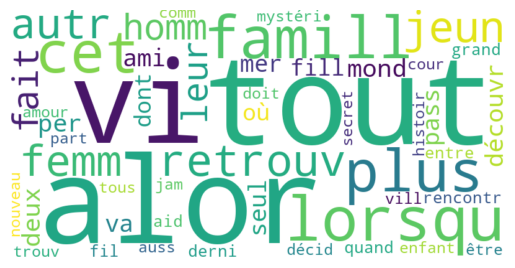

In [124]:
wordcloud = WordCloud(width = 800,
                      height = 400,
                      background_color='white',
                      stopwords=[],
                      max_words=50).generate(" ".join(corpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. Final cleaning function

In [119]:
def final_clean(doc) :

    new_doc = process_synopsis_3(doc,
                                 rejoin=False,
                                 lemm_or_stemm="stemm",
                                 list_rare_words=list_unique_words,
                                 min_len_word=2,
                                 force_is_alpha="alpha")
    return new_doc

In [125]:
df['clean_synopsis'] = df.Synopsis.apply(final_clean)

In [ ]:
# on reconverti la colonne clean_synopsis_str en chaine de char
df['clean_synopsis_str'] = df['clean_synopsis'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [ ]:
df.head(5)

## 5. Date de sortie to datetime

In [ ]:
df['Date de sortie'] = pd.to_datetime(df['Date de sortie'])

### 5.1 Age of movies

In [ ]:
current_year = datetime.now().year
df['Age du film'] = current_year - df['Date de sortie'].dt.year

## 6. Binary encoding of genres

In [ ]:
print(len(df))
print(df['Genre'].apply(lambda x: isinstance(x, str)).sum())

In [ ]:
df['Genre'] = df['Genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)
print(df['Genre'].apply(lambda x: isinstance(x, list)).sum())

In [ ]:
mlb = MultiLabelBinarizer()
genre_binarized = mlb.fit_transform(df['Genre'])

genre_df = pd.DataFrame(genre_binarized, columns=mlb.classes_)

In [ ]:
genre_df.index = df.index

In [ ]:
df = pd.concat([df.drop('Genre', axis=1), genre_df], axis=1)

# 7. Final df

In [ ]:
# df_final = df.copy()

In [ ]:
df.info()

In [ ]:
# df_final['tags'] = df_final['clean_synopsis_str']+df_final['Genre']

In [ ]:
# del_columns = ['Genre', 'clean_synopsis', 'clean_synopsis_str']

# df_final.drop(columns=del_columns, inplace=True)

In [ ]:
# df_final.columns

In [ ]:
# df_final = df_final[['ID', 'Titre', 'Date de sortie', 'Age du film', 'Note', 'Popularité',
#                      'Synopsis', 'tags', 'Affiche']]

In [ ]:
df.to_csv(r"..\CSV\df_movies_preprocess.csv", index=False)
genre_df.to_csv(r"..\CSV\genres_binarized.csv", index=False)